In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
import plotly.express as px

In [4]:
df = pd.read_excel(r"C:\Users\LENOVO\Dropbox\PC\Downloads\Datasets\3_ev_market_india_dataset.xlsx")
charging_stns = pd.read_csv(r"C:\Users\LENOVO\Dropbox\PC\Downloads\ev-charging-stations-india.csv")

In [5]:
df.head()

Brand                          Model  AccelSec  TopSpeed_KmH   
0       Tesla  Model 3 Long Range Dual Motor       4.6           233  \
1  Volkswagen                      ID.3 Pure      10.0           160   
2    Polestar                              2       4.7           210   
3         BMW                            iX3       6.8           180   
4       Honda                              e       9.5           145   

   Range_Km  Efficiency_WhKm  FastCharge_KmH RapidCharge PowerTrain   
0       450              161             940         Yes        AWD  \
1       270              167             250          No        RWD   
2       400              181             620         Yes        AWD   
3       360              206             560         Yes        RWD   
4       170              168             190         Yes        RWD   

     PlugType  BodyStyle Segment  Seats  PriceEuro  
0  Type 2 CCS      Sedan       D      5      55480  
1  Type 2 CCS  Hatchback       C      5      30000  
2  Type 2 CCS   Liftback       D      5      56440  
3  Type 2 CCS        SUV       D      5      68040  
4  Type 2 CCS  Hatchback       B      4      32997

In [6]:
df.shape

(103, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


In [8]:
df.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH   
count  103.000000    103.000000  103.000000       103.000000      103.000000  \
mean     7.396117    179.194175  338.786408       189.165049      444.271845   
std      3.017430     43.573030  126.014444        29.566839      203.949253   
min      2.100000    123.000000   95.000000       104.000000      170.000000   
25%      5.100000    150.000000  250.000000       168.000000      260.000000   
50%      7.300000    160.000000  340.000000       180.000000      440.000000   
75%      9.000000    200.000000  400.000000       203.000000      555.000000   
max     22.400000    410.000000  970.000000       273.000000      940.000000   

            Seats      PriceEuro  
count  103.000000     103.000000  
mean     4.883495   55811.563107  
std      0.795834   34134.665280  
min      2.000000   20129.000000  
25%      5.000000   34429.500000  
50%      5.000000   45000.000000  
75%      5.000000   65000.000000  
max      7.000000  215000.000000

In [11]:
brand_count = df['Brand'].value_counts()
fig = px.bar(x=brand_count.index, y=brand_count.values, labels={'x': 'Brand', 'y': 'Count'},title="Distribution of Electric Car Brands")
fig.show()


In [12]:
import plotly.io as pio
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Top speed cars',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [13]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Fastest accelaration car brands',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)

In [14]:
fig = px.pie(df,names = 'Brand',values = 'PriceEuro')
pio.show(fig)

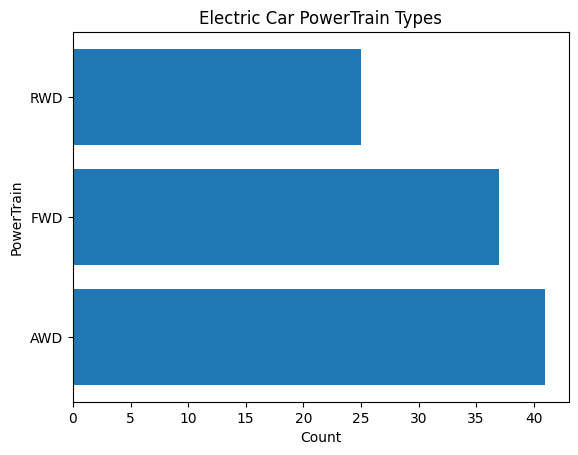

In [15]:
powertrain_counts = df['PowerTrain'].value_counts()
plt.barh(powertrain_counts.index, powertrain_counts.values)
plt.xlabel('Count')
plt.ylabel('PowerTrain')
plt.title('Electric Car PowerTrain Types')
plt.show()

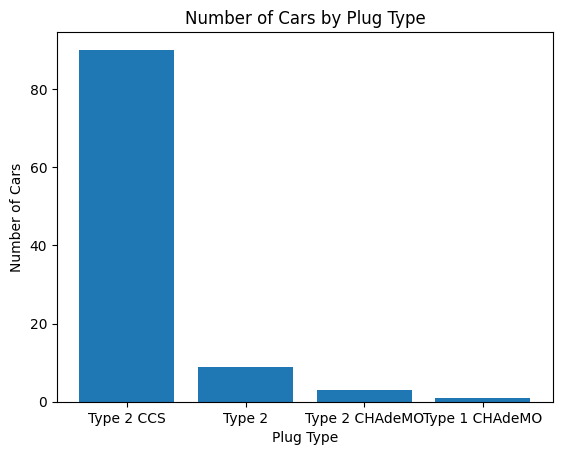

In [16]:
# Count the number of cars for each plug type
plug_type_counts = df['PlugType'].value_counts()

# Create a bar plot of the plug type counts
plt.bar(plug_type_counts.index, plug_type_counts.values)

# Add labels and title
plt.xlabel('Plug Type')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by Plug Type')

# Display the plot
plt.show()


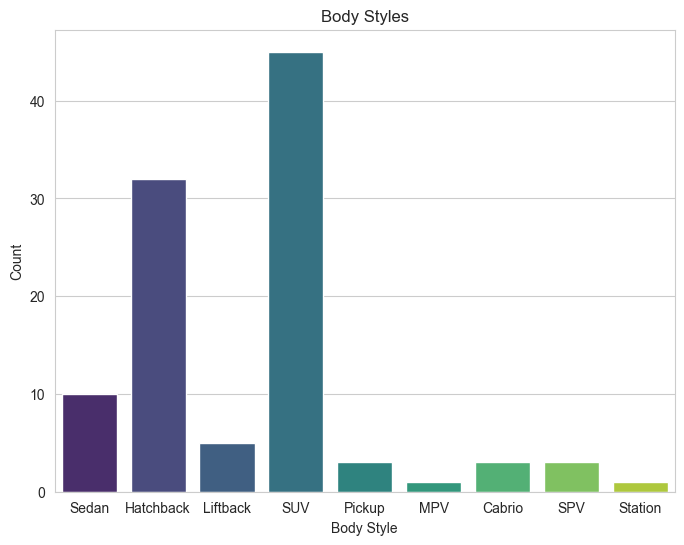

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='BodyStyle', data=df, palette='viridis')
plt.title('Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()


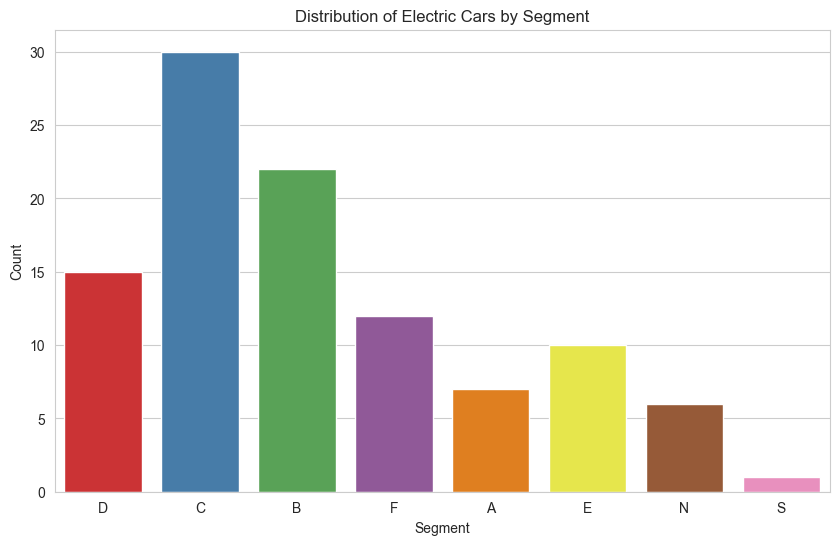

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='Segment', data=df, palette='Set1')
plt.title('Distribution of Electric Cars by Segment')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Segment', ylabel='count'>

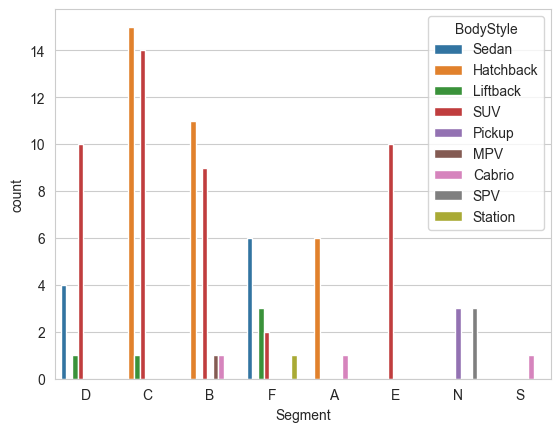

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Segment', hue='BodyStyle', data=df)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_25632\249861557.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




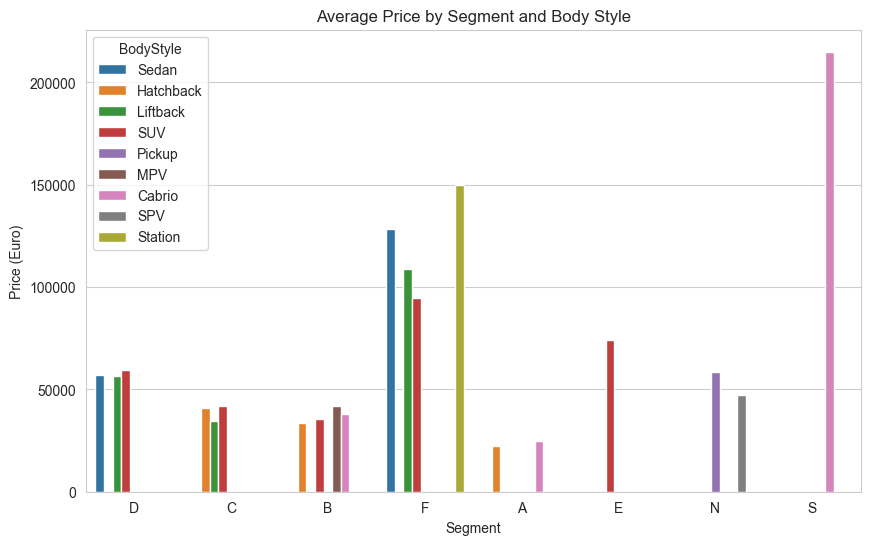

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Segment', y='PriceEuro', hue='BodyStyle', data=df, ci=None, ax=ax)
ax.set_title('Average Price by Segment and Body Style')
ax.set_xlabel('Segment')
ax.set_ylabel('Price (Euro)')
plt.show()

Correlation Coefficient: -0.79


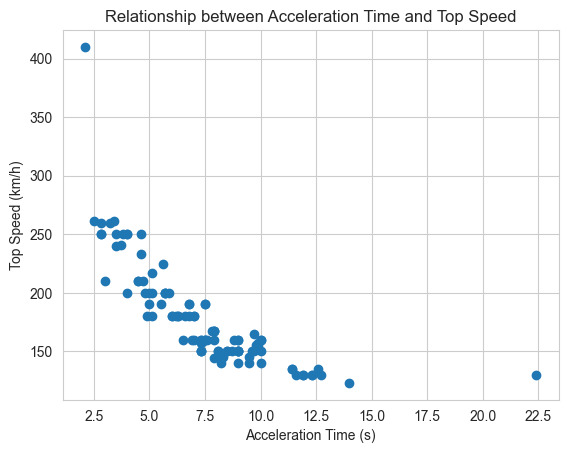

In [21]:
# Extract the relevant columns from the dataset
acceleration_time = df['AccelSec']
top_speed = df['TopSpeed_KmH']

# Create a scatterplot
plt.scatter(acceleration_time, top_speed)
plt.xlabel('Acceleration Time (s)')
plt.ylabel('Top Speed (km/h)')
plt.title('Relationship between Acceleration Time and Top Speed')

# Calculate the correlation coefficient
corr_coef = np.corrcoef(acceleration_time, top_speed)[0][1]
print('Correlation Coefficient: {:.2f}'.format(corr_coef))

# Show the plot
plt.show()


In practical terms, this suggests that car manufacturers are likely making a tradeoff between these two performance factors based on consumer preferences. Cars that have faster acceleration times tend to have lower top speeds, and cars that have higher top speeds tend to have slower acceleration times. This tradeoff is likely due to the fact that faster acceleration times require more power from the engine, which can limit the top speed that the car is capable of achieving. On the other hand, cars with higher top speeds may sacrifice acceleration time in order to achieve that top speed.

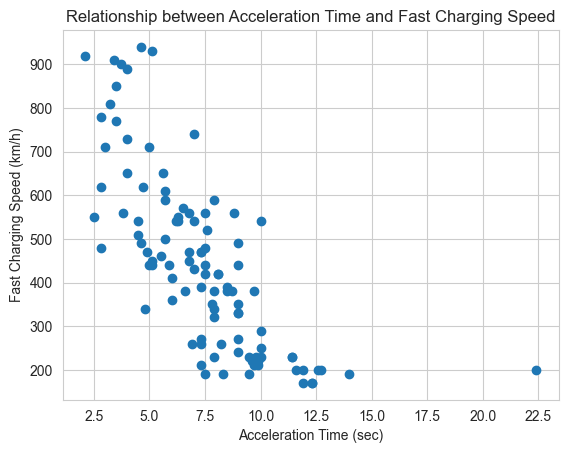

In [22]:
# Scatter plot of Acceleration Time vs Fast Charging Speed
plt.scatter(df['AccelSec'], df['FastCharge_KmH'])
plt.xlabel('Acceleration Time (sec)')
plt.ylabel('Fast Charging Speed (km/h)')
plt.title('Relationship between Acceleration Time and Fast Charging Speed')
plt.show()


It may suggest that car manufacturers are prioritizing one performance factor over the other based on consumer preferences. For example, if cars with faster acceleration times tend to have lower fast charging speeds, this may indicate that car manufacturers are prioritizing acceleration performance over charging speed. On the other hand, if there is a positive relationship between acceleration time and fast charging speed, this may suggest that car manufacturers are trying to balance these two performance factors.

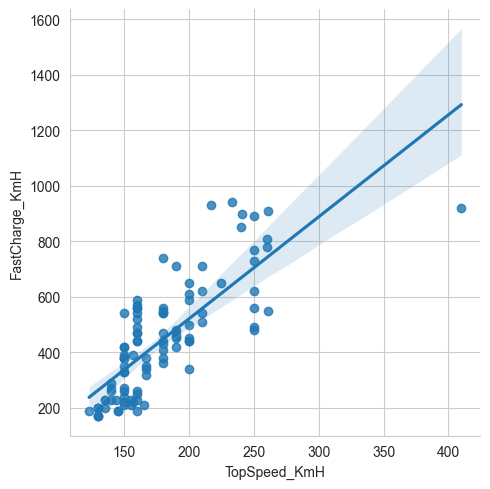

In [23]:
sns.lmplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df)


The slope of the line will indicate the direction of the relationship, and the correlation coefficient will indicate the strength of the relationship.

<Axes: xlabel='FastCharge_KmH', ylabel='PriceEuro'>

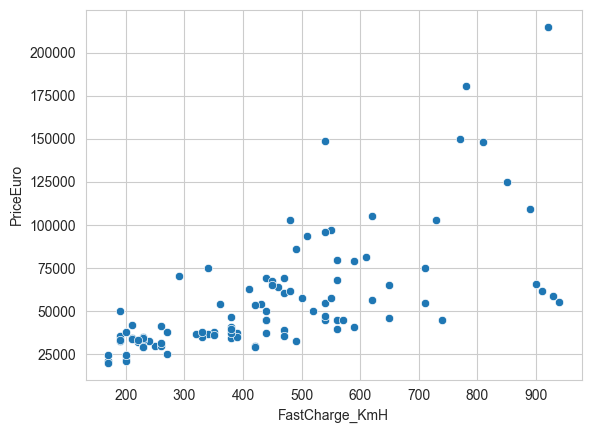

In [24]:
sns.scatterplot(x='FastCharge_KmH', y='PriceEuro', data=df)


The scatterplot clearly indicates that as Fast charging increases the price of the vehiches increases aswell.

Correlation Coefficient: 0.3130767864581909


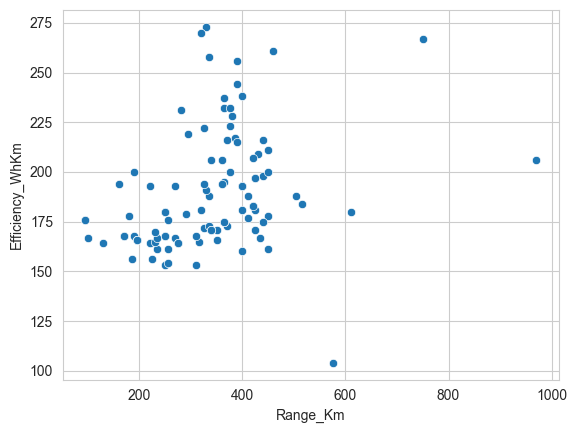

In [25]:
# Create scatter plot of range vs. efficiency
sns.scatterplot(x='Range_Km', y='Efficiency_WhKm', data=df)

# Calculate correlation coefficient
corr_coef = df['Range_Km'].corr(df['Efficiency_WhKm'])
print("Correlation Coefficient:", corr_coef)


More efficient cars are expected to travel farther on a single charge due to their lower energy consumption. However, there may be outliers where a car has a lower efficiency but a higher range, which may be due to other factors such as larger battery capacity.

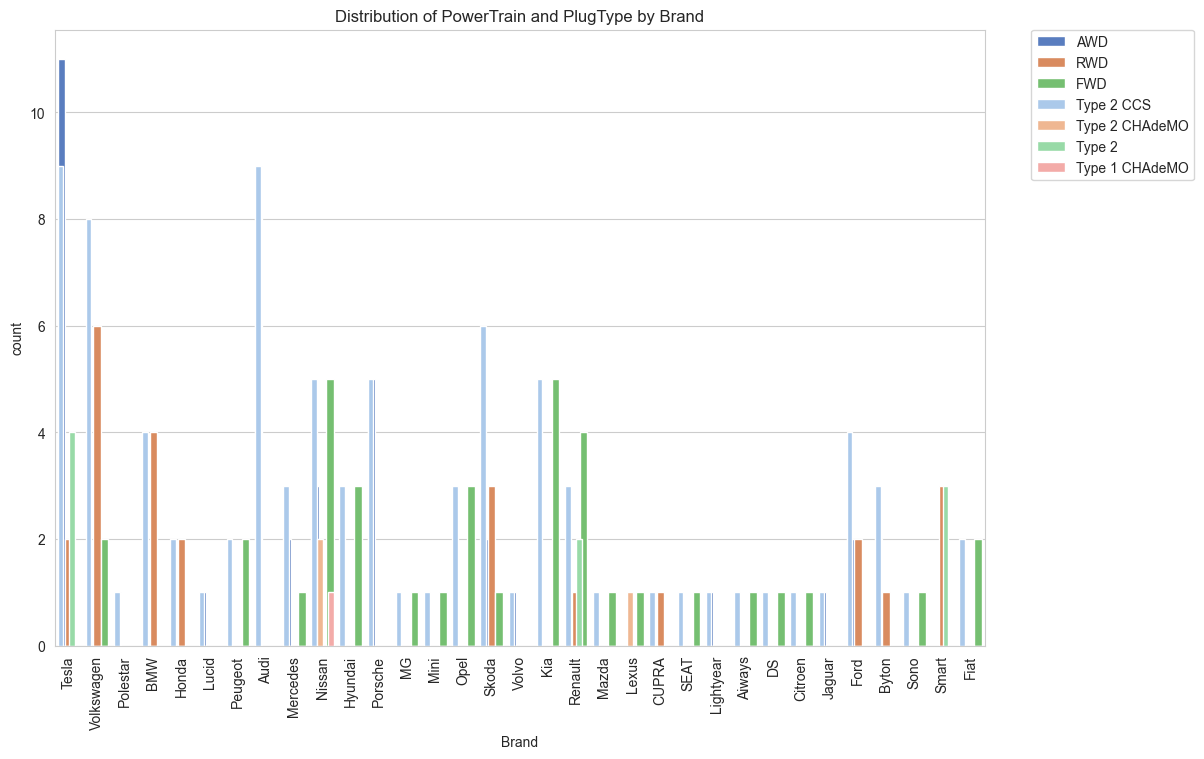

In [26]:
# Create a stacked bar chart showing the distribution of PowerTrain and PlugType
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
sns.countplot(x="Brand", hue="PowerTrain", data=df, palette="muted")
sns.countplot(x="Brand", hue="PlugType", data=df, palette="pastel")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Distribution of PowerTrain and PlugType by Brand")
plt.show()


This chart can help identify any patterns or trends that emerge, such as certain brands favoring a particular type of powertrain or plug type.

In [27]:
fig = px.bar(df,x = 'Range_Km',y = 'PowerTrain',color = 'PowerTrain',text='PowerTrain')
pio.show(fig)

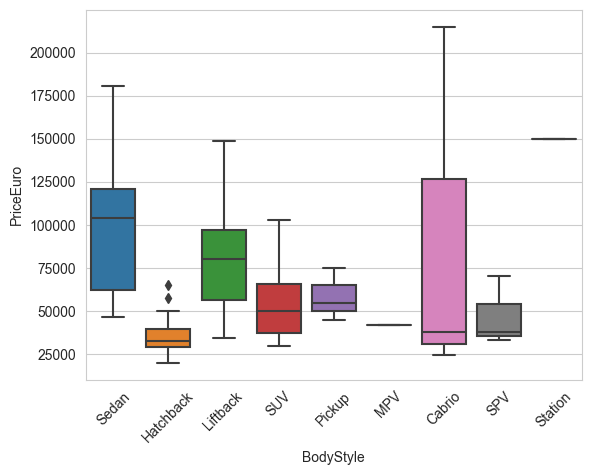

In [28]:
# Create a box plot of Price vs. BodyStyle
sns.boxplot(x='BodyStyle', y='PriceEuro', data=df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='RapidCharge', ylabel='count'>

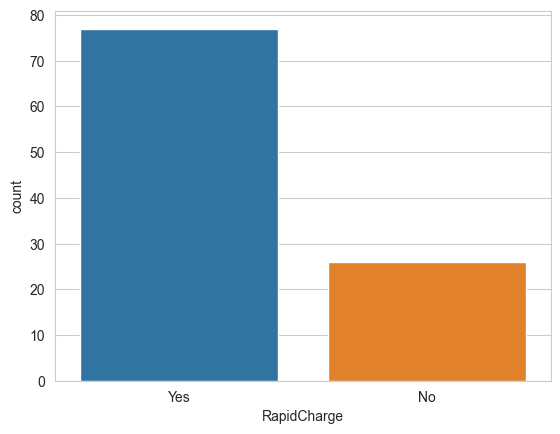

In [29]:
sns.countplot(x='RapidCharge', data=df)

In [30]:
fig = px.box(df,x='RapidCharge',y = 'PriceEuro',color = 'RapidCharge',points='all')
pio.show(fig)

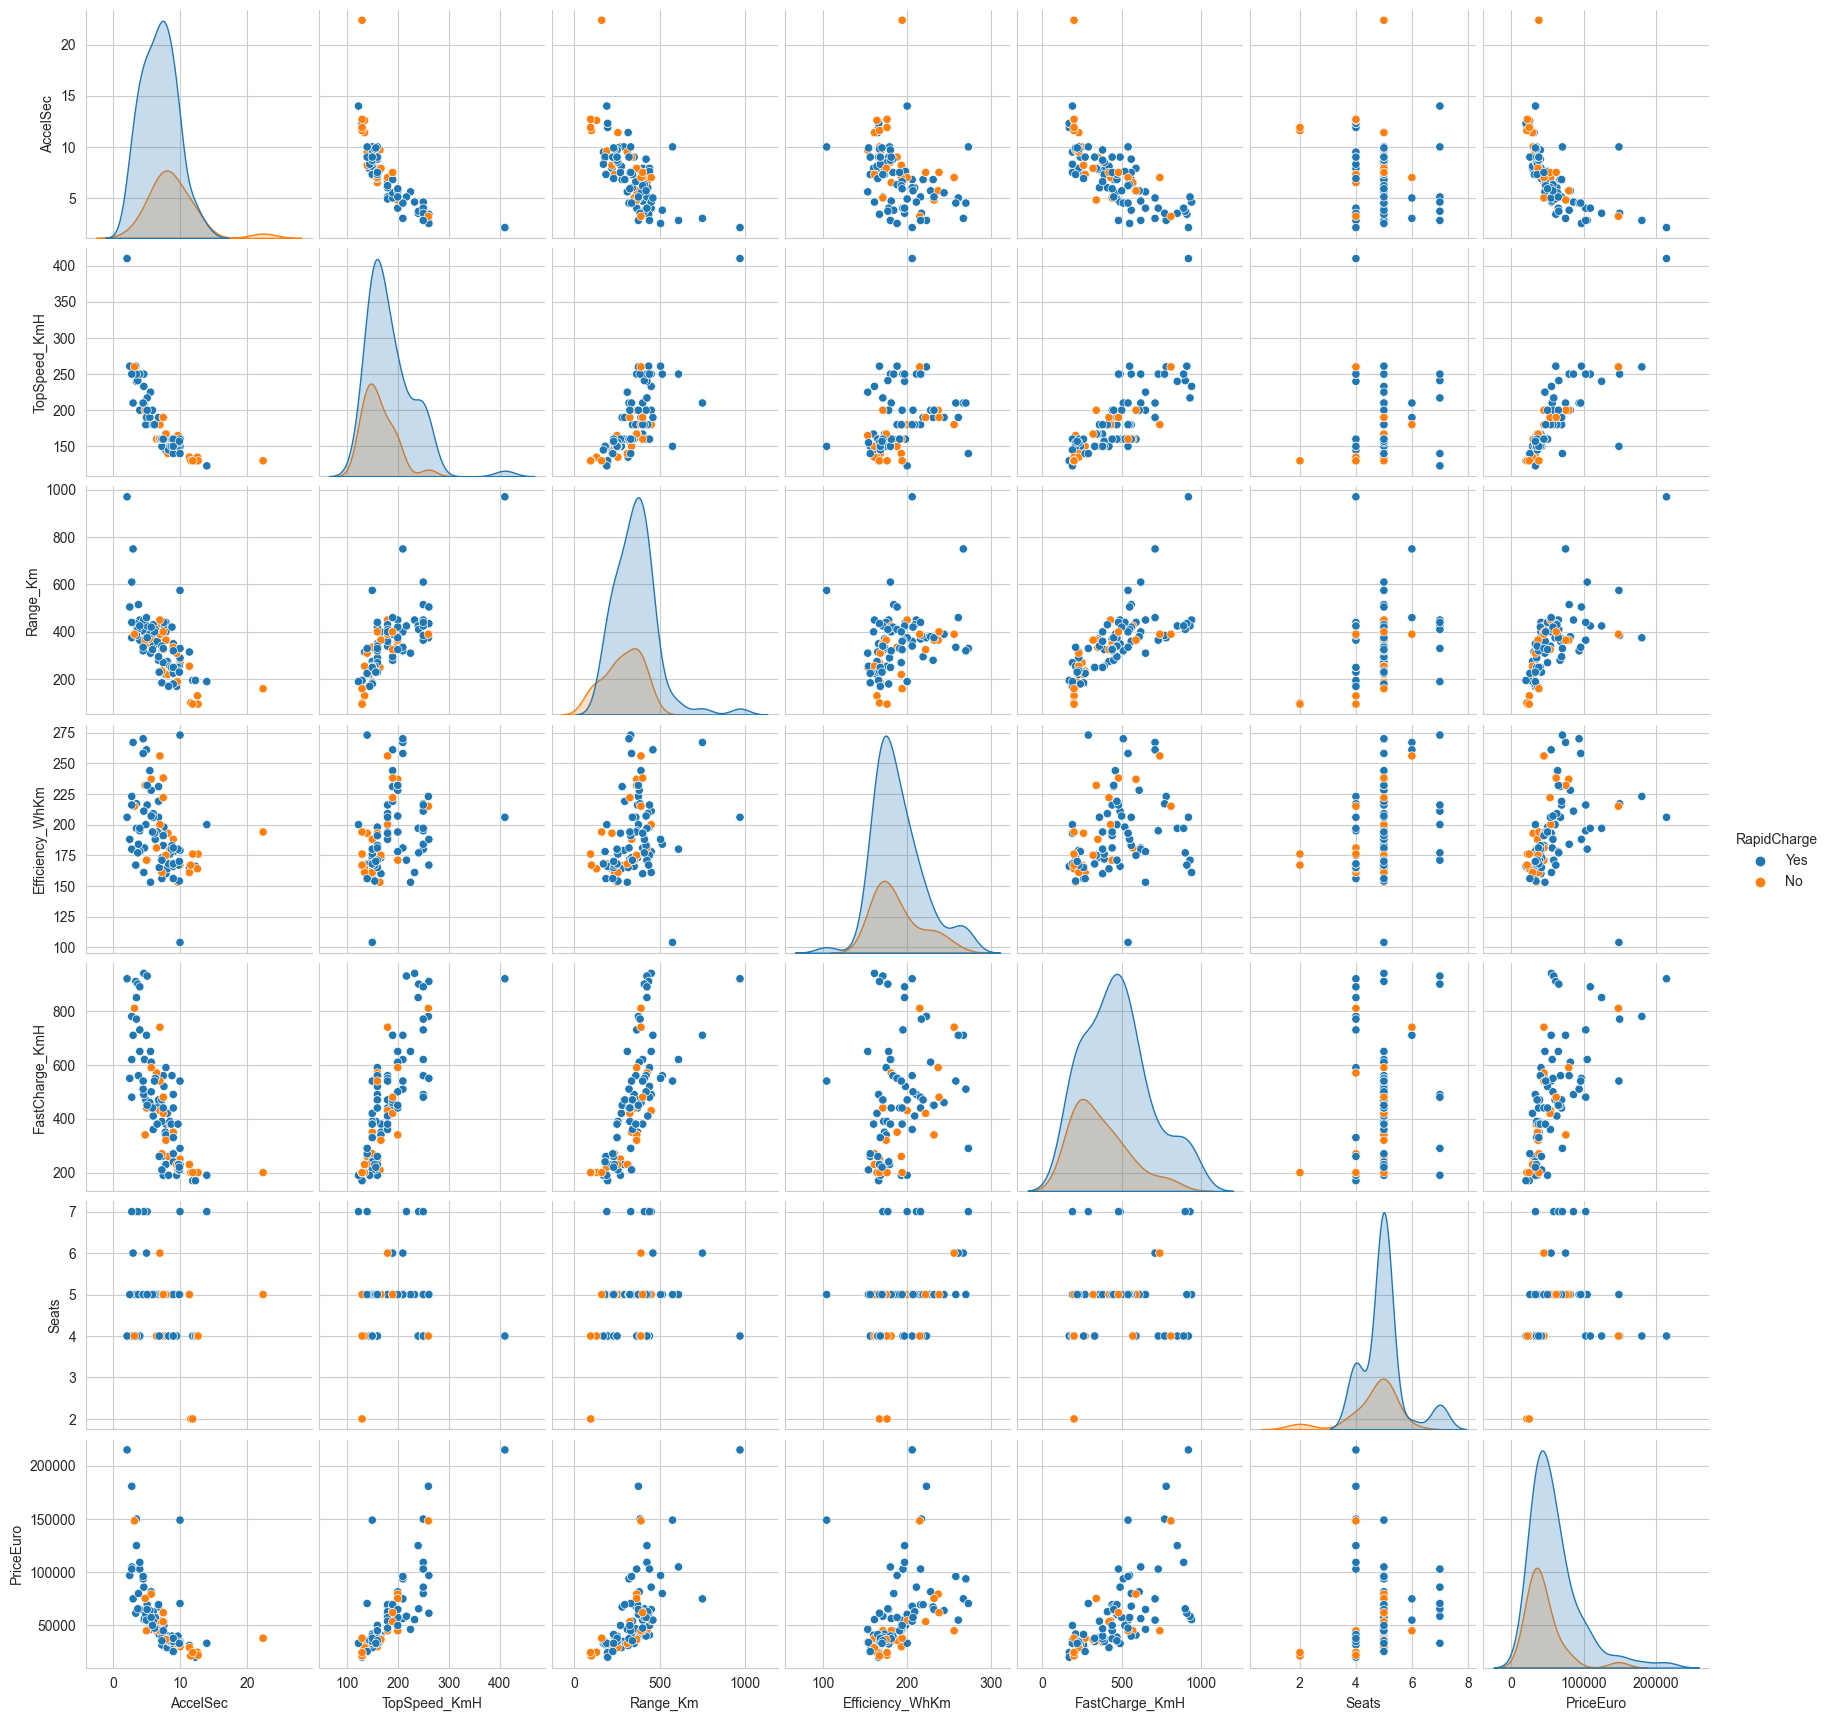

In [31]:
sns.pairplot(df,hue='RapidCharge')

In [32]:
fig = px.scatter(df, x='Range_Km', y='Efficiency_WhKm', color='BodyStyle', size='PriceEuro', hover_name='Model', title='Range vs Efficiency by Body Style and Price')
fig.show()


In [33]:
fig = px.scatter(df, x='Efficiency_WhKm', y='Range_Km', color='PriceEuro',
                 size='PriceEuro', hover_name='Model', log_x=True, size_max=60)

fig.update_layout(title='Electric Cars: Range vs Efficiency by Price Group',
                  xaxis_title='Efficiency (Wh/Km)', yaxis_title='Range (Km)',
                  legend_title='Price Group', hovermode='closest')

fig.show()


<Axes: title={'center': 'Car Price'}, xlabel='No. of Samples', ylabel='Car Price'>

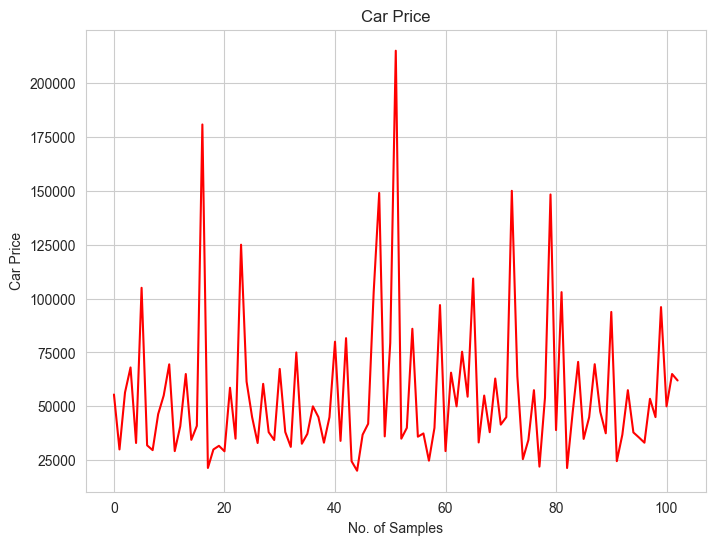

In [34]:
df['PriceEuro'].plot(figsize = (8,6),title='Car Price',xlabel = 'No. of Samples',ylabel = 'Car Price',color = 'red')

In [35]:
fig = px.scatter_3d(df,x = 'Brand',y = 'Seats',z = 'Segment',color='Brand')
fig 

In [36]:
fig = px.scatter_3d(df,x = 'Brand',y = 'AccelSec',z = 'PriceEuro',color = 'Brand')
fig

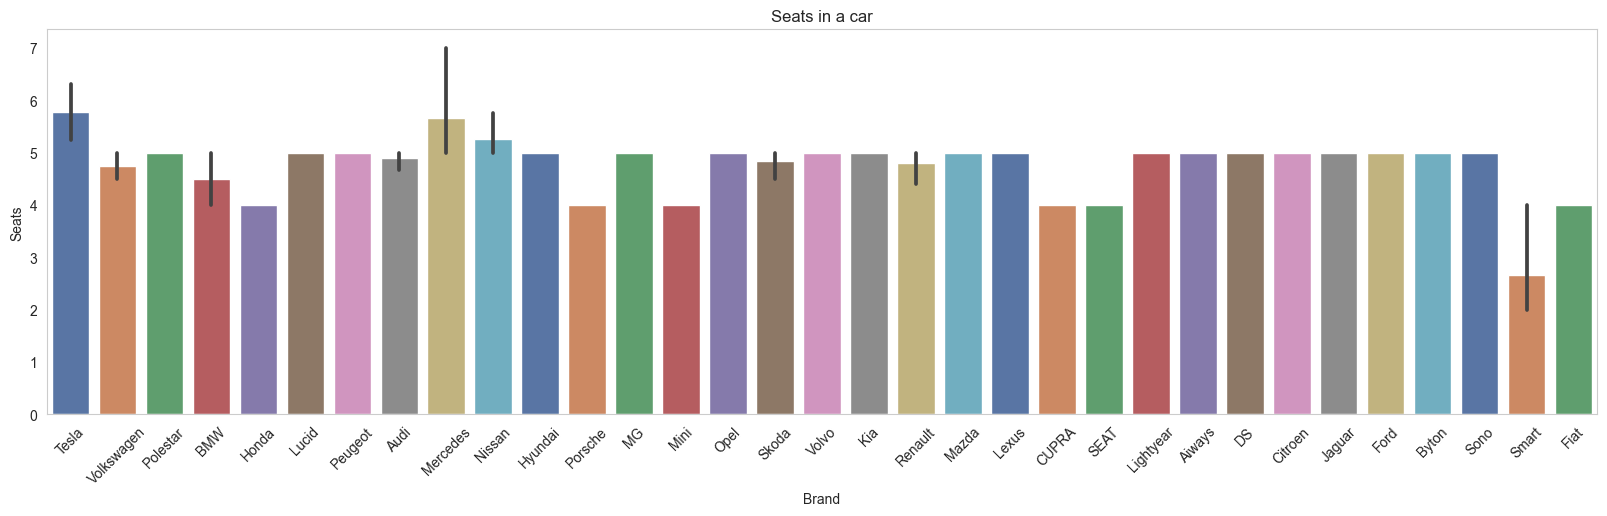

In [37]:
#Number of seats in each car
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Seats',data=df,palette='deep')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brand')
plt.ylabel('Seats')
plt.xticks(rotation=45)
plt.show()

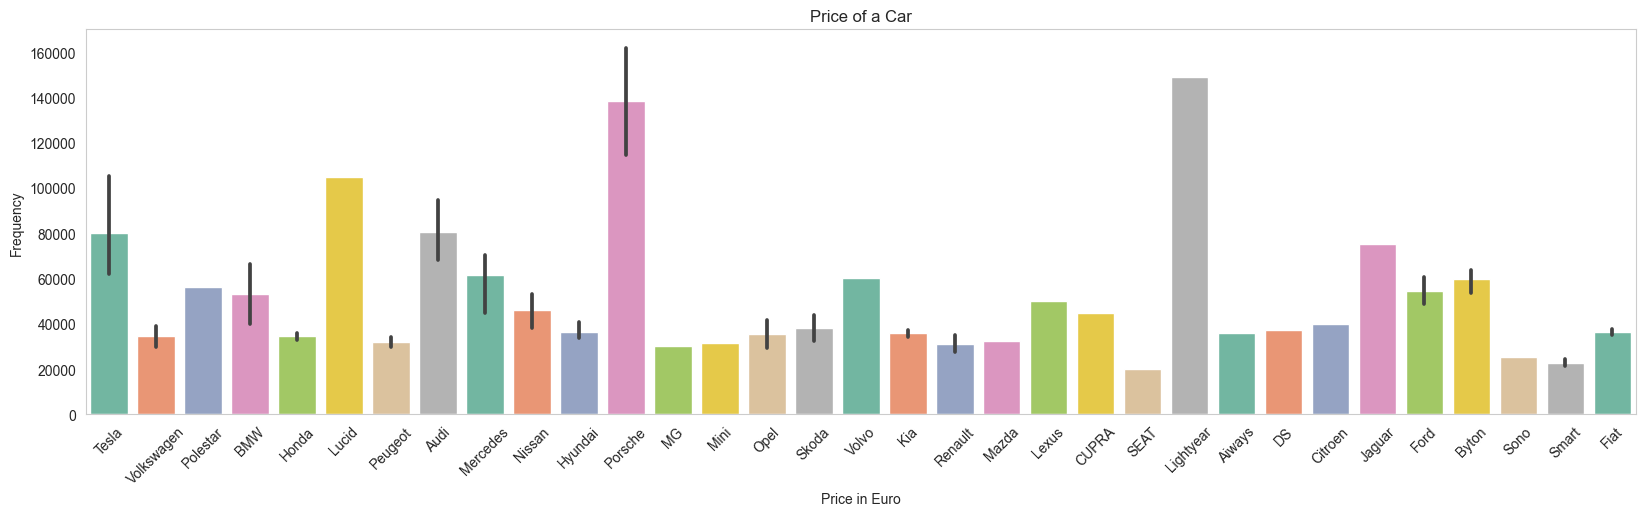

In [38]:
#Price of cars (in euro)
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='PriceEuro',data=df,palette='Set2')
plt.title('Price of a Car')
plt.xlabel('Price in Euro')
plt.grid(axis='y')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'No. of Seats')

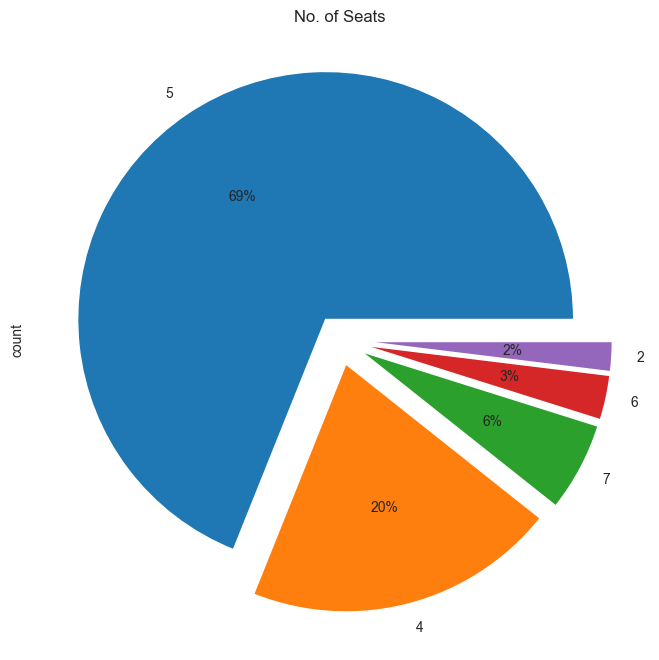

In [39]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('No. of Seats')

In [40]:
df1 = df.copy()

In [41]:
object_cols = df1.select_dtypes(include=['object']).columns
print(object_cols)

Index(['Brand', 'Model', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle',
       'Segment'],
      dtype='object')


In [42]:
df1['RapidCharge']

0      Yes
1       No
2      Yes
3      Yes
4      Yes
      ... 
98     Yes
99     Yes
100    Yes
101    Yes
102     No
Name: RapidCharge, Length: 103, dtype: object

In [43]:
# create a dictionary to map categories to binary values
color_map = {'Yes': 1, 'No': 0}

# use the map method to apply the mapping to the 'color' column
df1['RapidCharge'] = df1['RapidCharge'].map(color_map)

In [44]:
from sklearn.preprocessing import LabelEncoder

# create a LabelEncoder object
le = LabelEncoder()

In [45]:
# apply label encoding to the categorical columns
df1['PowerTrain'] = le.fit_transform(df1['PowerTrain'])
df1['PlugType'] = le.fit_transform(df1['PlugType'])
df1['BodyStyle'] = le.fit_transform(df1['BodyStyle'])
df1['Segment'] = le.fit_transform(df1['Segment'])

In [46]:
df1.sample()

Brand                Model  AccelSec  TopSpeed_KmH  Range_Km   
76  Audi  Q4 Sportback e-tron       6.3           180       410  \

    Efficiency_WhKm  FastCharge_KmH  RapidCharge  PowerTrain  PlugType   
76              188             550            1           0         2  \

    BodyStyle  Segment  Seats  PriceEuro  
76          6        3      5      57500

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    int64  
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    int32  
 9   PlugType         103 non-null    int32  
 10  BodyStyle        103 non-null    int32  
 11  Segment          103 non-null    int32  
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int32(4), int64(7), object(2)
memory usage: 9.8+ KB


In [48]:
# Create a new column for range segments
df1['RangeSegment'] = pd.cut(df1['Range_Km'], bins=[0, 200, 400, float('inf')], labels=['<200 km', '200-400 km', '>400 km'])

# Display the new column
print(df1['RangeSegment'].value_counts())


RangeSegment
200-400 km    64
>400 km       25
<200 km       14
Name: count, dtype: int64


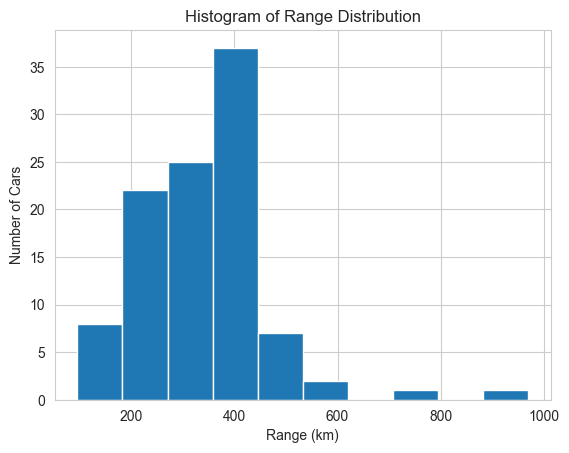

In [49]:
# Create a histogram of the range_Km column
plt.hist(df1['Range_Km'], bins=10)

# Add labels and title
plt.xlabel('Range (km)')
plt.ylabel('Number of Cars')
plt.title('Histogram of Range Distribution')
plt.show()

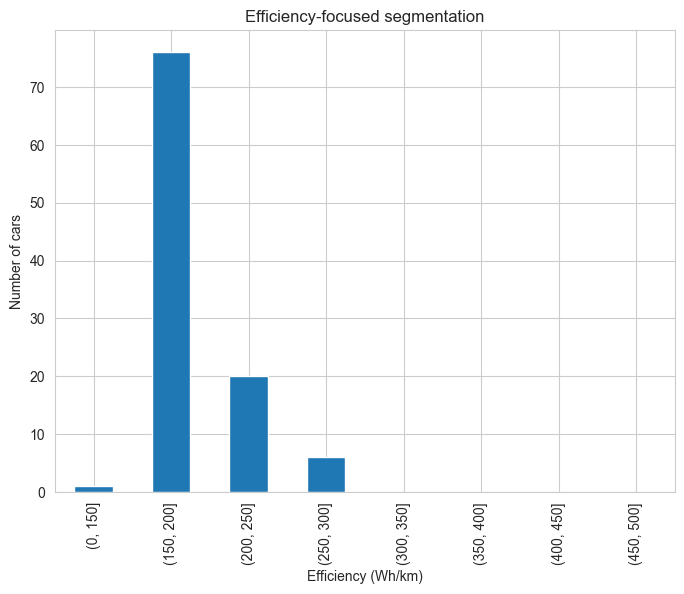

In [50]:
# Define the ranges for the segments based on efficiency
efficiency_ranges = [0, 150, 200, 250, 300, 350, 400, 450, 500]

# Create a new column in the dataframe with the segment labels
df['EfficiencySegment'] = pd.cut(df['Efficiency_WhKm'], efficiency_ranges)

# Plot the distribution of cars in each segment
plt.figure(figsize=(8, 6))
df['EfficiencySegment'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Efficiency (Wh/km)')
plt.ylabel('Number of cars')
plt.title('Efficiency-focused segmentation')
plt.show()


In [51]:
df3= df[["TopSpeed_KmH", "PriceEuro"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "PriceEuro"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df5.head()

TopSpeed_KmH
Range_Km              
95                   2
100                  1
130                  1
160                  1
170                  2

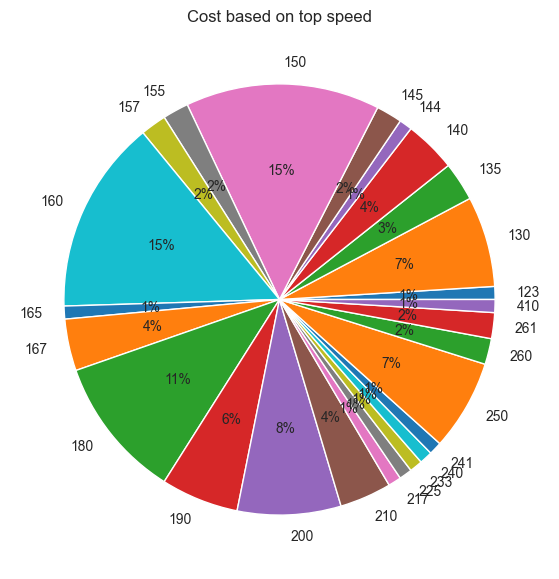

In [52]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["PriceEuro"],labels=df3.index,autopct='%1.0f%%')
plt.show()

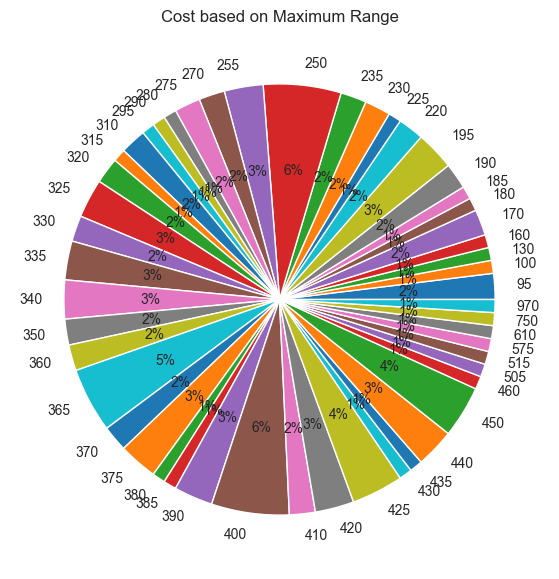

In [53]:
plt.figure(figsize=(10,7))
plt.title('Cost based on Maximum Range')
plt.pie(x=df4["PriceEuro"],labels=df4.index,autopct='%1.0f%%')
plt.show()

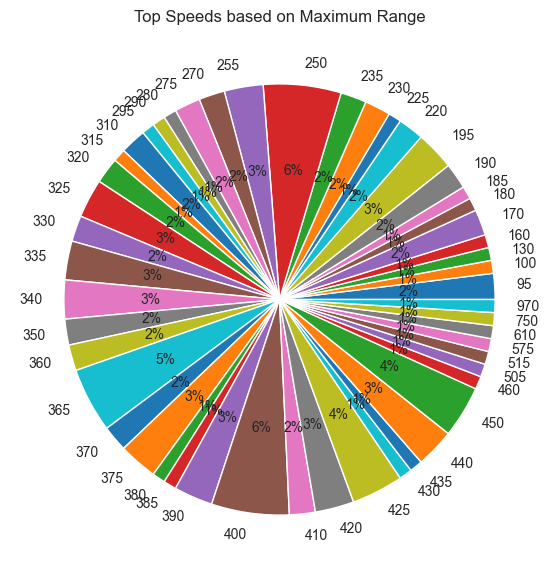

In [54]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

#### Linear regression using OLS method

In [55]:
import statsmodels.api as sm

In [57]:
x=df1[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df1['PriceEuro']

In [58]:
x= sm.add_constant(x)
results = sm.OLS(y,x)

In [59]:
results

In [60]:
model=results.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.36
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.57e-24
Time:                        13:37:13   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2342.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.263e+04   2.53e+04     -3.659      0.000   -1.43e+05   -4.24e+04
AccelSec         1753.0004   1048.759      1.672      0.098    -328.769    3834.770
Range_Km           36.3000     22.629      1.604      0.112      -8.618      81.218
TopSpeed_KmH      581.7484     80.158      7.257      0.000     422.636     740.861
Efficiency_WhKm   117.6685     70.307      1.674      0.097     -21.890     257.227
RapidCharge      1465.5687   4496.958      0.326      0.745   -7460.822    1.04e+04
PowerTrain      -5235.8309   2956.235     -1.771      0.080   -1.11e+04     632.248
==============================================================================
Omnibus:                       84.867   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              741.645
Skew:                           2.644   Prob(JB):                    8.99e-162
Kurtosis:                      15.036   Cond. No.                     6.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Linear Regression 

In [61]:
x=df1[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm', 'RapidCharge','PowerTrain']]
y=df1['PriceEuro']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=365)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [64]:
# Train the logistic regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [66]:
r2=(r2_score(y_test,y_pred))
print(r2*100)

78.7707238023266


#### Decision Tree

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
# Create a decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

In [69]:
# Train the regressor on the training set
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
# Make predictions on the testing set
y_pred = regressor.predict(X_test)

In [71]:
from sklearn.metrics import mean_squared_error
# Evaluate the performance of the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [72]:
print('Mean Squared Error:', mse)
print('R-squared Value:', r2)

Mean Squared Error: 543589596.032258
R-squared Value: 0.6733264779314232


#### Clustering

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

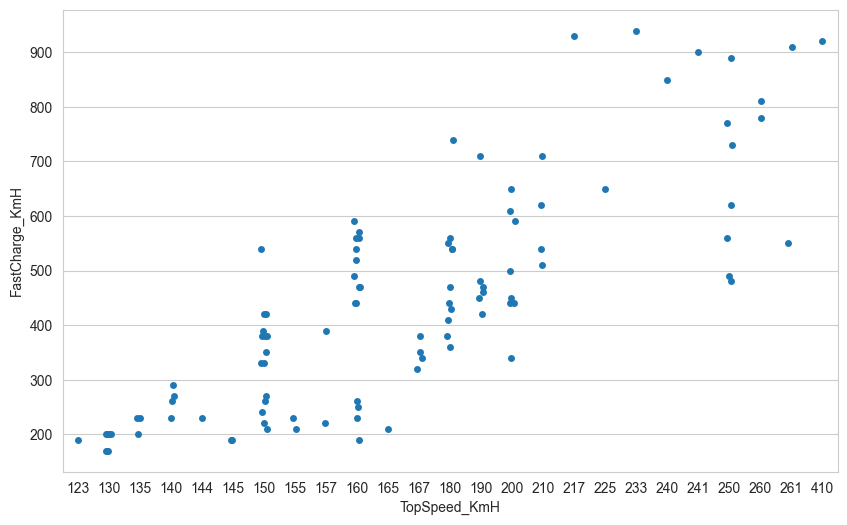

In [73]:
ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df1, jitter=True)

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

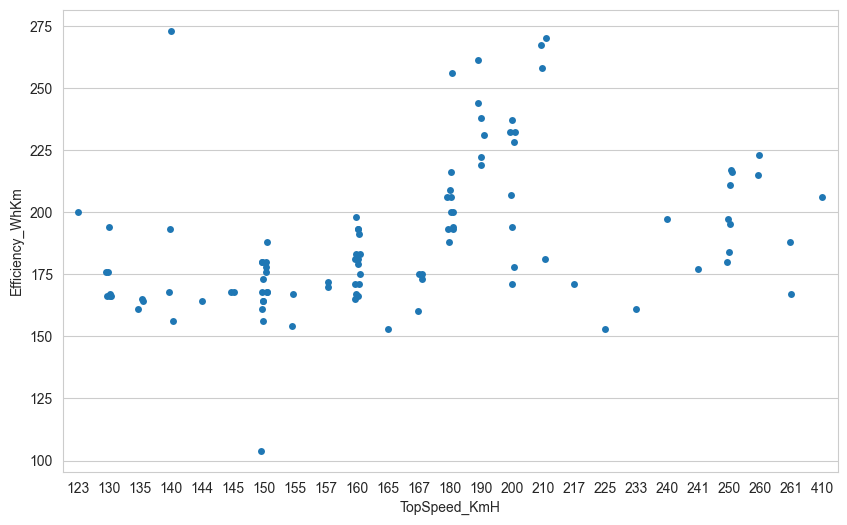

In [74]:
ax=plt.subplots(figsize=(10,6))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df1, jitter=True)

In [75]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge',
            'Range_Km', 'Seats', 'PriceEuro','PowerTrain']
# Separating out the features
x = df1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [76]:
pca = PCA(n_components=9)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8','PC9'])
data2

PC1       PC2       PC3       PC4       Pc5       PC6       PC7   
0    2.429225 -0.554599 -1.147772 -0.882791  0.839988 -0.959297  0.998880  \
1   -2.322483 -0.345449  0.896473 -1.305529  0.079598  0.235116 -0.213678   
2    1.587851  0.008899 -0.650523  0.041024  0.593537 -0.698248  0.058718   
3    0.291018 -0.000150 -0.307702 -0.514196 -1.608861  0.291624  0.364999   
4   -2.602679 -0.626489 -0.888088  0.585294 -0.802108  0.027387 -0.084955   
..        ...       ...       ...       ...       ...       ...       ...   
98  -0.297170  0.446713 -0.463601  0.102542 -0.346005 -0.100457  0.031080   
99   2.335018  0.630747  0.985883  1.560112 -0.817327 -0.121906  0.164115   
100  0.780642  0.426821 -0.298636  0.708598  0.481728 -0.540071 -0.139753   
101  1.540920  0.698754  0.422384  1.094921 -0.298113 -0.307992 -0.363230   
102  0.915051  0.261495  2.410642  0.188002  0.340820  0.015609 -0.171875   

          PC8       PC9  
0    0.711148 -0.396662  
1   -0.544135 -0.181867  
2    0.248837 -0.202775  
3   -0.235543  0.261663  
4   -0.507790 -0.049904  
..        ...       ...  
98   0.202253  0.145390  
99  -0.255651  0.141023  
100 -0.048733 -0.367509  
101  0.127251 -0.190397  
102  0.567633 -0.200822  

[103 rows x 9 columns]

In [77]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data2.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6   
variable                                                               
PC1      -0.396410  0.086150  0.064757  0.058253  0.144548  0.676910  \
PC2       0.421973 -0.216762  0.002272 -0.068523  0.038208  0.045212   
PC3       0.238316  0.330919  0.571780  0.380475 -0.575143  0.024863   
PC4       0.394519 -0.138428 -0.047650 -0.296483 -0.092366 -0.237914   
Pc5       0.157195  0.269920 -0.803300  0.395300 -0.292581  0.086978   
PC6       0.389544 -0.024746 -0.076295 -0.387135 -0.032841  0.364461   
PC7       0.140425  0.801307  0.019535 -0.428983  0.165256  0.086668   
PC8       0.389779 -0.262265  0.073787  0.179862  0.043293  0.558706   
PC9      -0.322888 -0.180494 -0.098293 -0.486554 -0.722814  0.149888   

               PC7       PC8       PC9  
variable                                
PC1       0.412498  0.270655 -0.324562  
PC2       0.037576 -0.413810 -0.770777  
PC3       0.004703  0.144167 -0.098954  
PC4       0.728208  0.358365  0.105702  
Pc5       0.053875  0.040830 -0.056056  
PC6      -0.520811  0.534180 -0.038015  
PC7       0.098379 -0.320750  0.079999  
PC8       0.118043 -0.382139  0.517207  
PC9       0.019098 -0.265275  0.033267

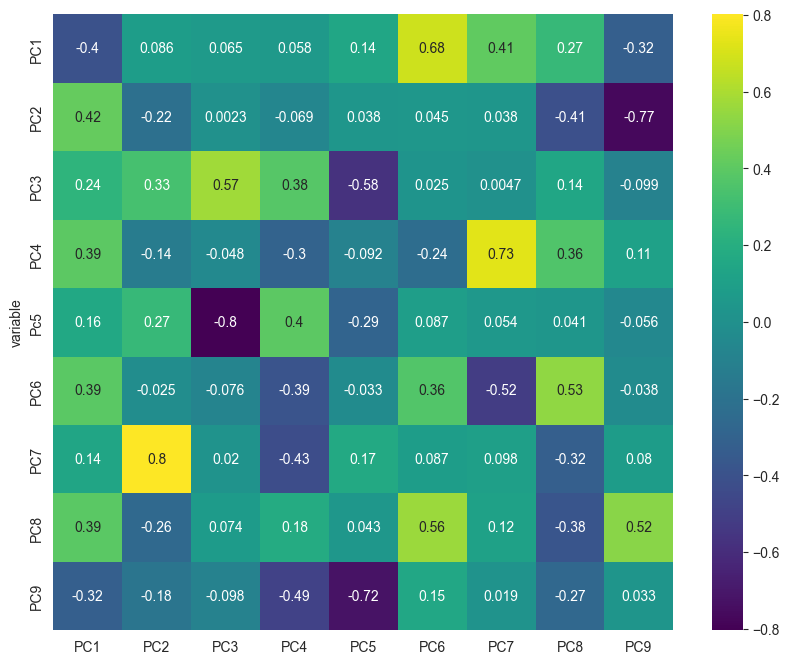

In [78]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (10,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.show()

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

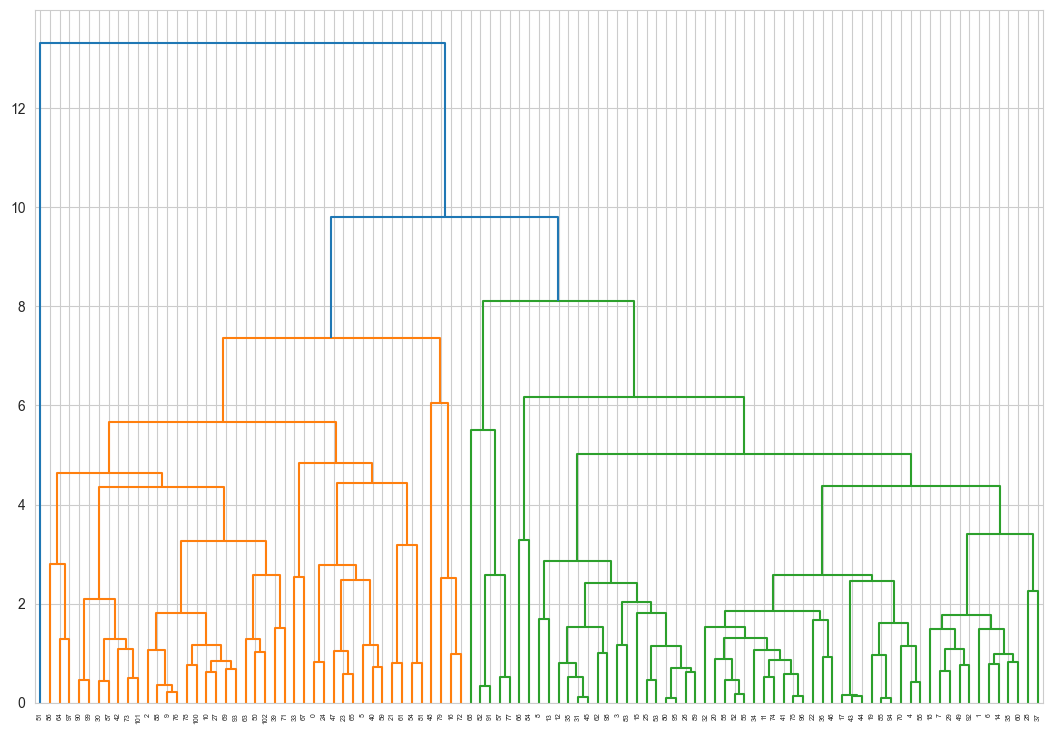

In [80]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

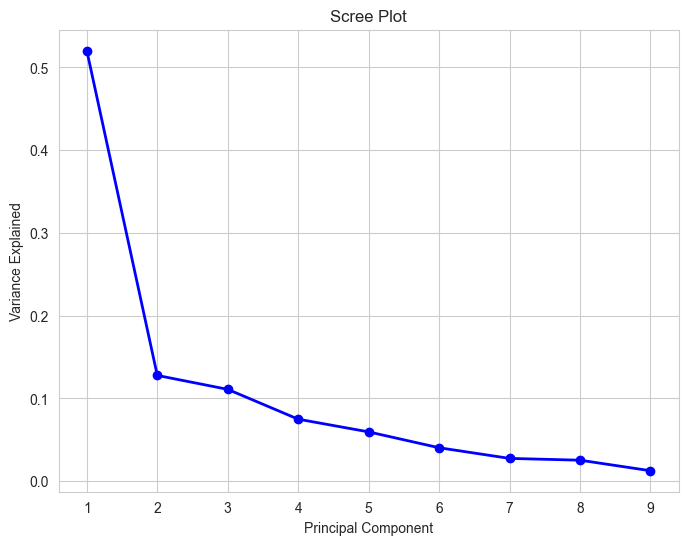

In [81]:
plt.rcParams['figure.figsize'] = (8,6)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [82]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

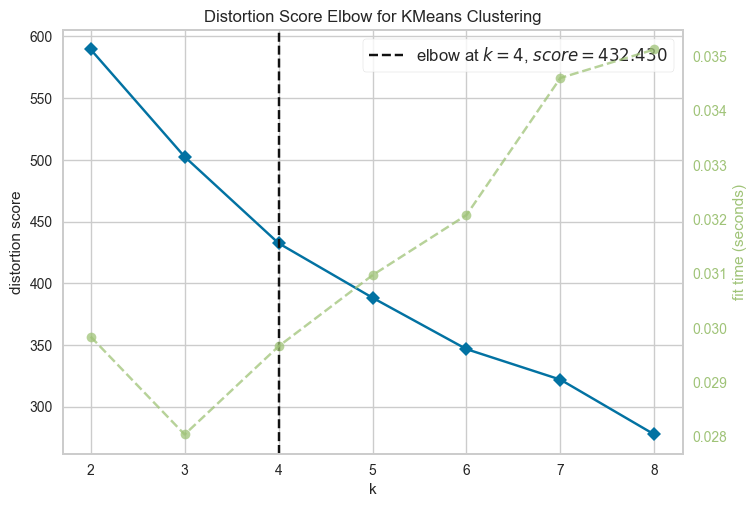

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

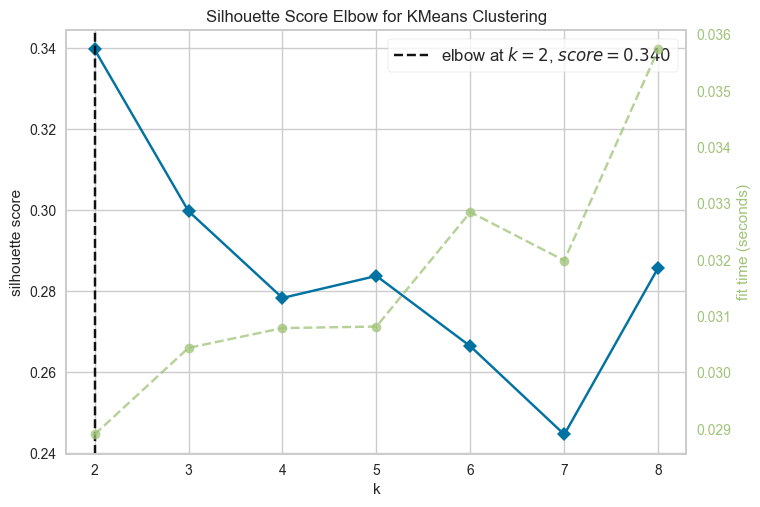

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [84]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='silhouette', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

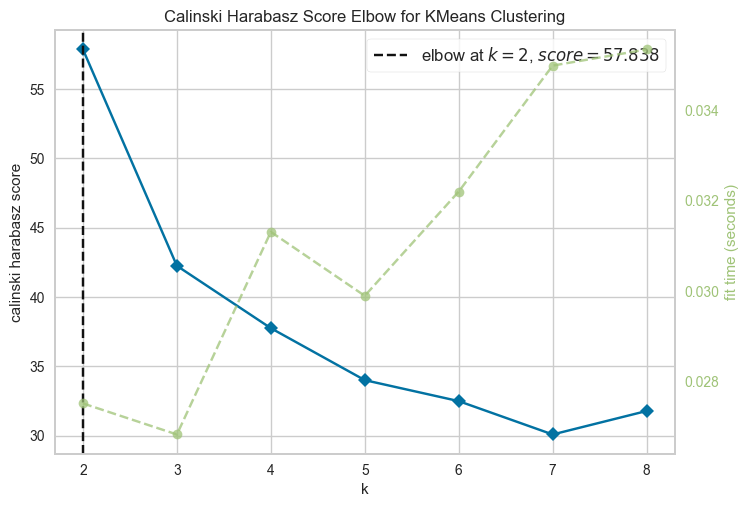

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [85]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='calinski_harabasz', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [86]:
#K-means clustering 
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df1['cluster_num'] = kmeans.labels_ 

In [87]:
print (kmeans.labels_) #Label assigned for each data point

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


In [88]:
print (kmeans.inertia_) #gives within-cluster sum of squares. 

427.8874684517364


In [89]:
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares

5


In [90]:
print(kmeans.cluster_centers_)

[[ 3.38080722 -1.38222959 -0.36489344  0.10476922  0.40601443  0.27185359
   0.24199669 -0.10661851  0.04313075]
 [-1.28035008  0.15751337 -0.80380172  0.03882667 -0.26171256  0.0576548
  -0.02518157 -0.04843479 -0.00967151]
 [ 1.47340441  0.75533302  0.44439293  0.22304959  0.00587772 -0.20900642
  -0.04639724  0.13707866  0.00747268]
 [-2.1666201  -0.64972069  1.15112147 -0.52704354  0.24950081  0.04766166
  -0.03574547 -0.05850103 -0.02224405]]


In [91]:
from collections import Counter

In [92]:
#To see each cluster size
Counter(kmeans.labels_)

Counter({0: 13, 3: 19, 2: 32, 1: 39})

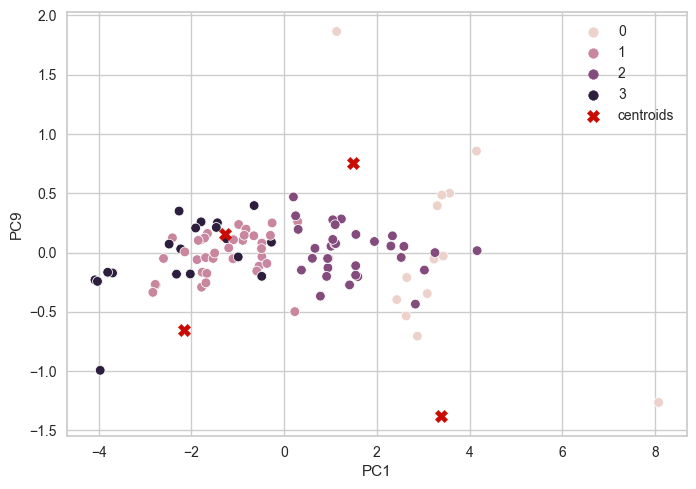

In [93]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC9", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

#### Regression with PCA

In [94]:
X=data2[['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7','PC8','PC9']]
y=df1['PriceEuro']

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
# Create a linear regression model object
model_2 = LinearRegression()

In [97]:
model_2.fit(x_train, y_train)

LinearRegression()

In [98]:
# Predict the output variable using the test set
y_pred = model_2.predict(x_test)

In [99]:
y_pred

array([ 67358.,  55000.,  50000., 102945.,  81639.,  79990.,  93800.,
        36837.,  69484.,  55480.,  30000.,  38105.,  53500.,  34900.,
        57500.,  32997., 148301.,  75000.,  40795.,  33000.,  50000.])

In [100]:
# Evaluate the model's performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0392539657904324e-21


In [101]:
# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 1.0


In [102]:
predictions=model_2.predict(x_test)
predictions

array([ 67358.,  55000.,  50000., 102945.,  81639.,  79990.,  93800.,
        36837.,  69484.,  55480.,  30000.,  38105.,  53500.,  34900.,
        57500.,  32997., 148301.,  75000.,  40795.,  33000.,  50000.])

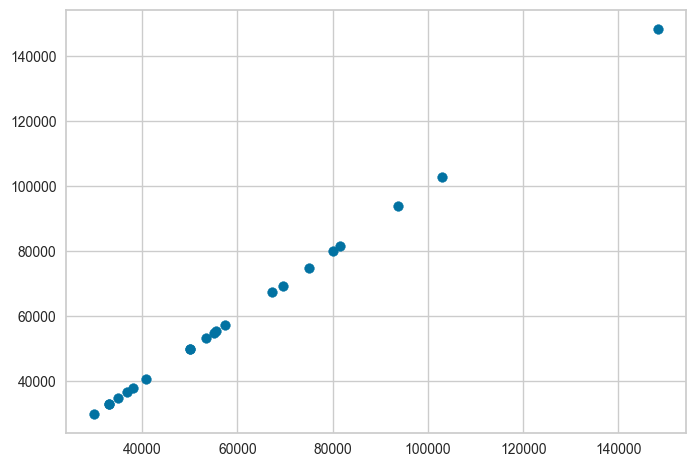

In [103]:
plt.scatter(y_test, predictions)

<Axes: xlabel='PriceEuro', ylabel='Density'>

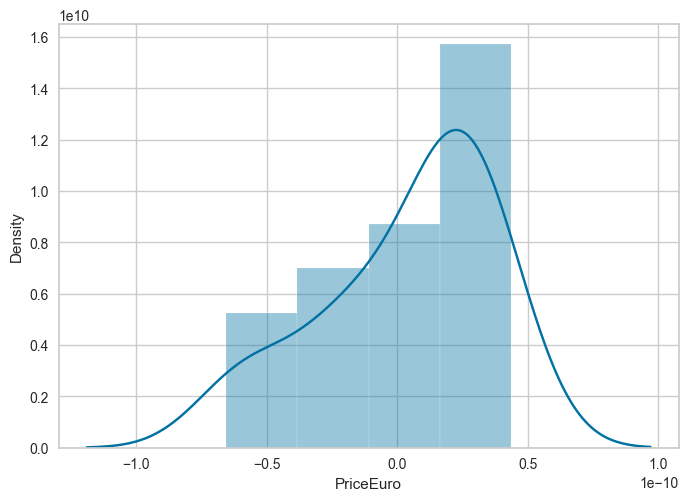

In [104]:
#Residual histogram plot
sns.distplot((y_test-predictions))

In [105]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.78911708543698e-11
MSE: 1.0392539657904324e-21
RMSE: 3.223746214872431e-11


In [106]:
metrics.mean_absolute_error(y_test,predictions)

2.78911708543698e-11

In [107]:
metrics.mean_squared_error(y_test,predictions)

1.0392539657904324e-21

In [108]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

3.223746214872431e-11

### Plotting some EV Charging stations in India

In [109]:
charging_stns.head()

name          state      city   
0                 Neelkanth Star DC Charging Station        Haryana  Gurugram  \
1                       Galleria DC Charging Station        Haryana  Gurugram   
2  Highway Xpress (Jaipur-Delhi) DC charging station      Rajasthan    Behror   
3                  Food Carnival DC Charging Station  Uttar Pradesh  Khatauli   
4                  Food Carnival AC Charging Station  Uttar Pradesh  Khatauli   

                                             address lattitude  longitude   
0  Neelkanth Star Karnal, NH 44, Gharunda, Kutail...   29.6019    76.9803  \
1  DLF Phase IV, Sector 28, Gurugram, Haryana 122022   28.4673    77.0818   
2  Jaipur to Delhi Road, Behror Midway, Behror, R...   27.8751    76.2760   
3  Fun and Food Carnival, NH 58, Khatauli Bypass,...   29.3105    77.7218   
4  NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...   29.3105    77.7218   

   type  
0  12.0  
1  12.0  
2  12.0  
3  12.0  
4  12.0

In [110]:
# Preprocess the column to handle problematic values
charging_stns['lattitude'] = charging_stns['lattitude'].str.replace(',', '')  # Remove any commas

# Convert the column from float to int if needed
charging_stns['lattitude'] = charging_stns['lattitude'].astype(float)

In [114]:
# Drop rows with null values in a specific column
charging_stns = charging_stns.dropna(subset=['address','lattitude','longitude'])


In [120]:
import gmplot

# Create a map centered at the mean latitude and longitude of your data
gmap = gmplot.GoogleMapPlotter(charging_stns['lattitude'].mean(), charging_stns['longitude'].mean(), zoom=6)

# Add markers for each charging station
gmap.scatter(charging_stns['lattitude'], charging_stns['longitude'], '#FF0000', size=40, marker=False)

# Draw the map
gmap.draw('map.html')

In [122]:
from IPython.display import IFrame

# Display the HTML file in an iframe
IFrame('map.html', width=800, height=600)

In [124]:
ev_charger = pd.read_csv(r"C:\Users\LENOVO\Dropbox\PC\Downloads\Datasets\1_ev_charger_dataset.csv")

In [125]:
ev_charger

Region     2W     3W    4W  Bus  Chargers
0      Uttar Pradesh   9852  42881   458  197       207
1         Maharastra  38558    893  1895  186       317
2          Karnataka  32844    568   589   57       172
3         Tamil Nadu  25642    396   426    0       256
4            Gujarat  22359    254   423   22       228
5              Delhi  11756   5287  1578  186        72
6              Bihar   2388  10783    89   36        37
7              Assam    357  11547    42    0        20
8             Kerala  10345    308   578    0       131
9             Odisha   9540    253    89    0        18
10    Andhra Pradesh  14578   2587   524    0       266
11         Rajasthan   2387   1578    24    0       205
12    Madhya Pradesh   1789   1254    57    0       159
13       West Bengal   3547   3654   124    0       141
14         Telangana   4578    898   186    0        70
15        Chandigadh   1567    542    32    0        65
16           Haryana   5782   2876   354    0        50
17         Meghalaya    856    566    18    0        40
18            Sikkim    525    425    12    0        29
19   Jammu & Kashmir    187    234    27    0        25
20      Chhattisgarh    259    964    34    0        25
21       Uttarakhand    954   1865   134    0        10
22        Puducherry    641    995    35    0        10
23  Himachal Pradesh    824    868   289    0        10

In [128]:
total_vehicles = ev_charger ['2W'].sum() + ev_charger['3W'].sum() + ev_charger['4W'].sum() + ev_charger['Bus'].sum()
total_vehicles

303292

In [129]:
market_share_2W = (ev_charger['2W'].sum() / total_vehicles) * 100
market_share_3W = (ev_charger['3W'].sum() / total_vehicles) * 100
market_share_4W = (ev_charger['4W'].sum() / total_vehicles) * 100
market_share_Bus = (ev_charger['Bus'].sum() / total_vehicles) * 100

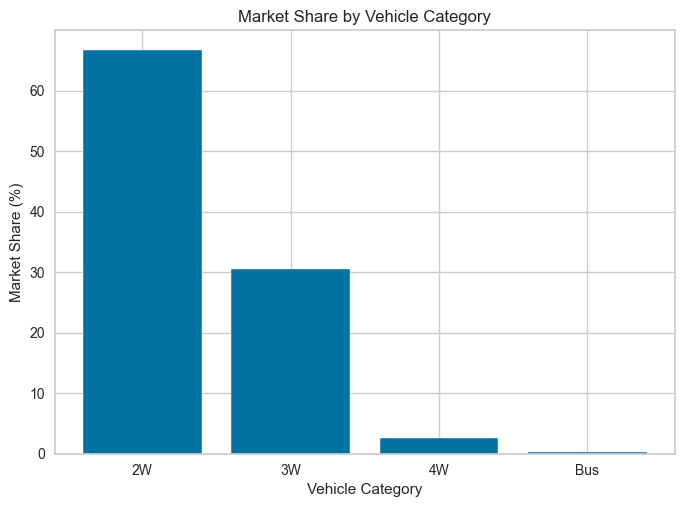

In [130]:
categories = ['2W', '3W', '4W', 'Bus']
market_shares = [market_share_2W, market_share_3W, market_share_4W, market_share_Bus]

plt.bar(categories, market_shares)
plt.xlabel('Vehicle Category')
plt.ylabel('Market Share (%)')
plt.title('Market Share by Vehicle Category')
plt.show()

2 wheeler EV are found to have most of the market share, on the other hand EV Buses are the least.

In [131]:
chargers_2W = ev_charger['Chargers'].sum() * ev_charger['2W'].sum()
chargers_3W = ev_charger['Chargers'].sum() * ev_charger['3W'].sum()
chargers_4W = ev_charger['Chargers'].sum() * ev_charger['4W'].sum()
chargers_Bus = ev_charger['Chargers'].sum() * ev_charger['Bus'].sum()

In [132]:
ratio_2W = chargers_2W / ev_charger['2W'].sum()
ratio_3W = chargers_3W / ev_charger['3W'].sum()
ratio_4W = chargers_4W / ev_charger['4W'].sum()
ratio_Bus = chargers_Bus / ev_charger['Bus'].sum()

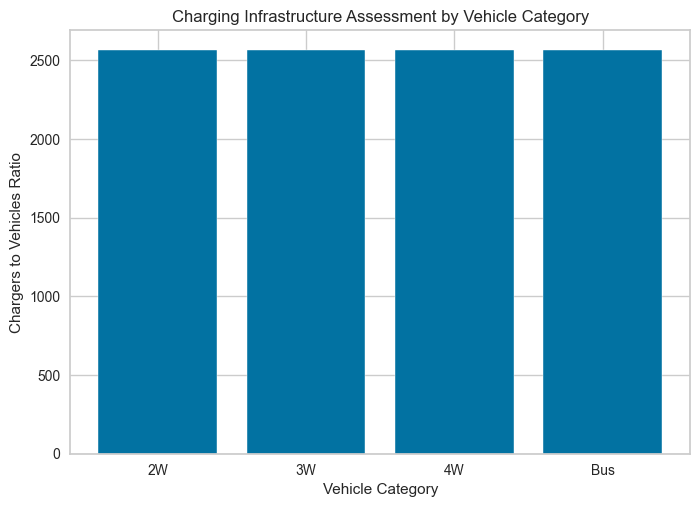

In [133]:
categories = ['2W', '3W', '4W', 'Bus']
ratios = [ratio_2W, ratio_3W, ratio_4W, ratio_Bus]

plt.bar(categories, ratios)
plt.xlabel('Vehicle Category')
plt.ylabel('Chargers to Vehicles Ratio')
plt.title('Charging Infrastructure Assessment by Vehicle Category')
plt.show()


In [138]:
vehicle_counts = ev_charger.groupby('Region')[['2W', '3W', '4W', 'Bus']].sum()
charger_counts = ev_charger.groupby('Region')['Chargers'].sum()

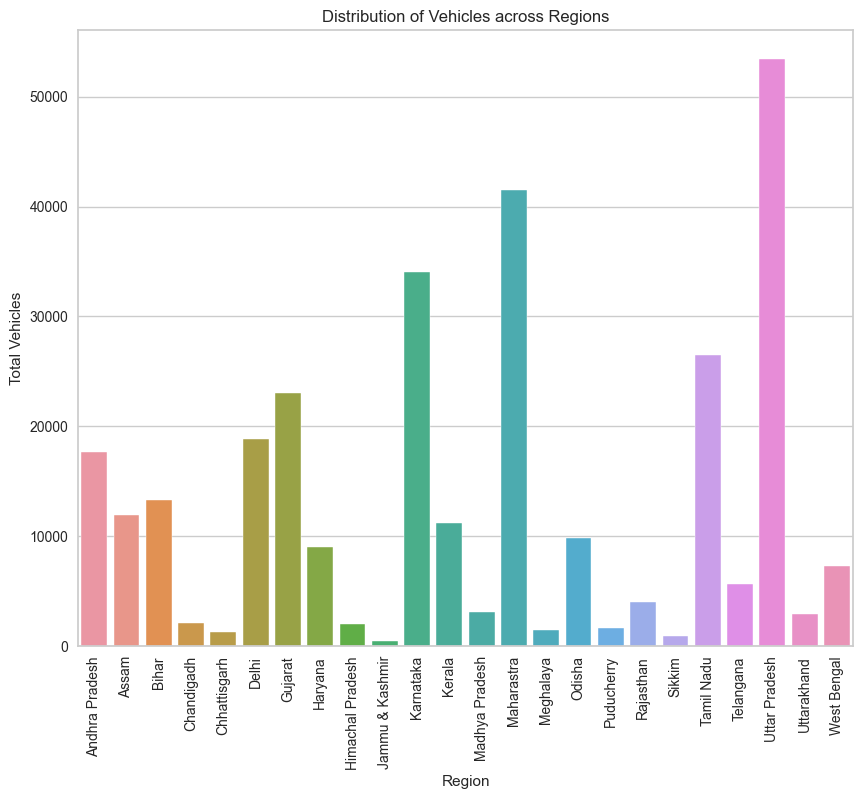

In [141]:
plt.rcParams['figure.figsize'] = (10,8)
sns.barplot(x=vehicle_counts.index, y=vehicle_counts.values.sum(axis=1))
plt.xlabel('Region')
plt.ylabel('Total Vehicles')
plt.title('Distribution of Vehicles across Regions')
plt.xticks(rotation=90)
plt.show()

In [142]:
ev_charger['TimePeriod'] = range(1, len(ev_charger) + 1)

In [143]:
vehicle_counts = ev_charger.groupby('TimePeriod')[['2W', '3W', '4W', 'Bus']].sum()
charger_counts = ev_charger.groupby('TimePeriod')['Chargers'].sum()

In [144]:
vehicle_growth = vehicle_counts.pct_change() * 100
charger_growth = charger_counts.pct_change() * 100

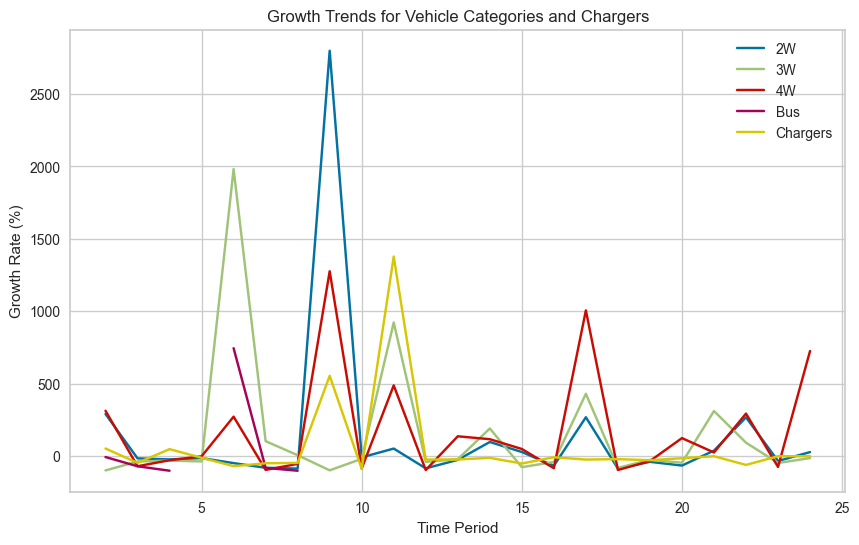

In [148]:
plt.figure(figsize=(10, 6))
for column in vehicle_growth.columns:
    plt.plot(vehicle_growth.index, vehicle_growth[column], label=column)
plt.plot(charger_growth.index, charger_growth, label='Chargers')
plt.xlabel('Time Period')
plt.ylabel('Growth Rate (%)')
plt.title('Growth Trends for Vehicle Categories and Chargers')
plt.legend()
plt.show()

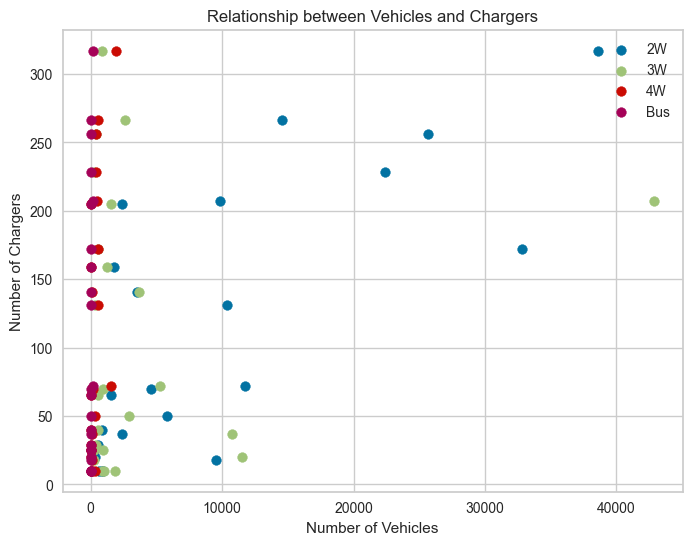

In [149]:
plt.figure(figsize=(8, 6))
plt.scatter(ev_charger['2W'], ev_charger['Chargers'], label='2W')
plt.scatter(ev_charger['3W'], ev_charger['Chargers'], label='3W')
plt.scatter(ev_charger['4W'], ev_charger['Chargers'], label='4W')
plt.scatter(ev_charger['Bus'], ev_charger['Chargers'], label='Bus')
plt.xlabel('Number of Vehicles')
plt.ylabel('Number of Chargers')
plt.title('Relationship between Vehicles and Chargers')
plt.legend()
plt.show()